In [1]:
from fastai.vision.all import *

In [2]:
path = "/home/tkrsh/demo/demo_model/data/hemorrhage"

In [3]:
files = get_image_files("/home/tkrsh/demo/demo_model/data/hemorrhage")

In [4]:
device = torch.device("cpu")
default_device()

device(type='cuda', index=0)

In [5]:
classes = ["Hemorrhage","Normal"]

In [6]:
data = ImageDataLoaders.from_folder(path, train="train",test="test", valid_pct=0.2, bs=12,   batch_tfms=[*aug_transforms(size=(120,120)), 
                Normalize.from_stats(*imagenet_stats)]
)

/home/tkrsh/.local/lib/python3.8/site-packages/torch/_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:766.)
  ret = func(*args, **kwargs)


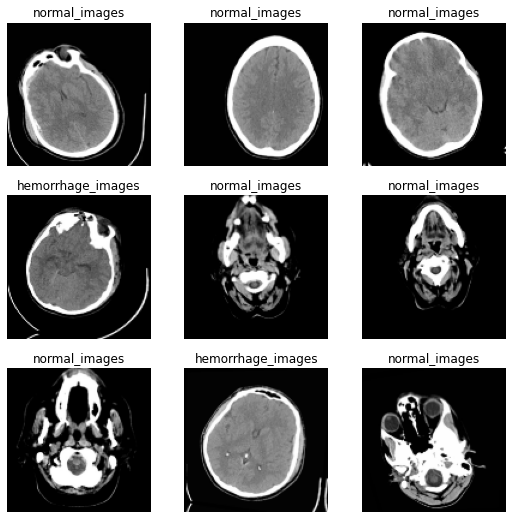

In [7]:
data.show_batch()


In [8]:
default_device()

device(type='cuda', index=0)

In [9]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)


In [10]:
learn.fit_one_cycle(50)


epoch,train_loss,valid_loss,accuracy,time
0,1.133127,0.779849,0.620000,00:19
1,1.052139,0.821505,0.614000,00:17
2,1.054328,0.778811,0.670000,00:18
3,0.970482,0.786093,0.672000,00:17
4,0.894111,0.732899,0.706000,00:18
5,0.803756,0.612777,0.720000,00:18
6,0.708540,0.635761,0.712000,00:18
7,0.685484,0.554757,0.732000,00:18
8,0.588781,0.577657,0.730000,00:18
9,0.567161,0.424601,0.798000,00:17


In [11]:
learn.export("/home/tkrsh/demo/demo_model/model_a.pkl")